In [1]:
conda instal statsmodels

usage: conda [-h] [--no-plugins] [-V] COMMAND ...
conda: error: argument COMMAND: invalid choice: 'instal' (choose from 'clean', 'compare', 'config', 'create', 'info', 'init', 'install', 'list', 'notices', 'package', 'remove', 'uninstall', 'rename', 'run', 'search', 'update', 'upgrade', 'doctor', 'pack', 'develop', 'inspect', 'index', 'metapackage', 'debug', 'render', 'token', 'verify', 'build', 'server', 'repo', 'skeleton', 'convert', 'env', 'content-trust')

Note: you may need to restart the kernel to use updated packages.


In [2]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear.

In [3]:
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.

In [4]:
# Configure API key 

quandl.ApiConfig.api_key = 'wHxMQmMyWPEE1bbeaR6Z'

In [5]:
# Importing the Federal Reserve Economic Data "Natural Rate of Unemployment" variable.

data = quandl.get('FRED/FPCPITOTLZGJPN')

In [6]:
data.head(5)

,Value
Date,
1960-01-01,3.574512
1961-01-01,5.368464
1962-01-01,6.835438
1963-01-01,6.706896
1964-01-01,3.800388


In [7]:
data.shape

(61, 1)

In [8]:
data.columns

Index(['Value'], dtype='object')

In [9]:
type(data)

pandas.core.frame.DataFrame

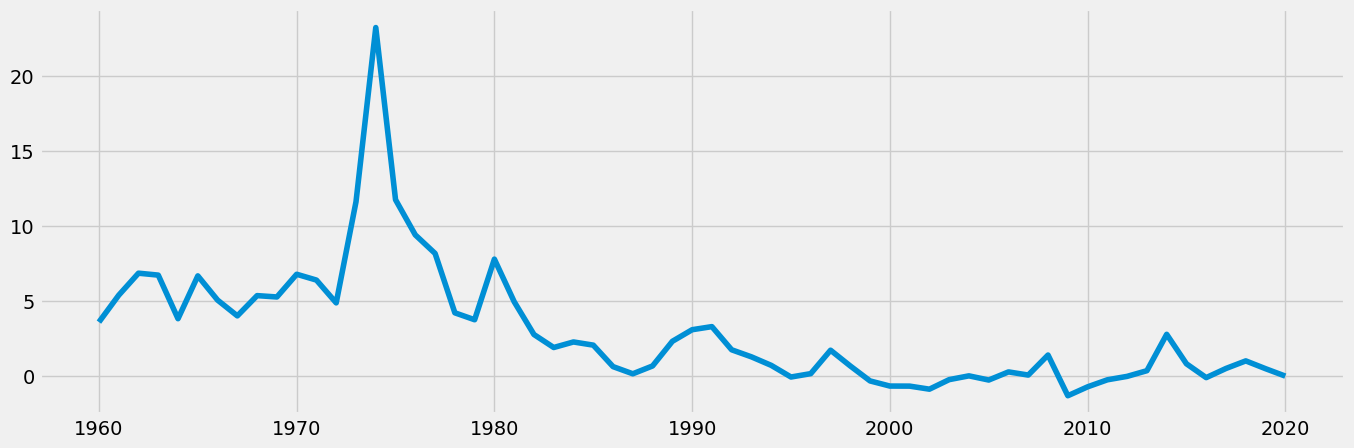

In [10]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(data)

In [11]:
# Reset index so that you can use the "Date" column as a filter

data_2 = data.reset_index()

In [12]:
data_2.head()

,Date,Value
0,1960-01-01,3.574512
1,1961-01-01,5.368464
2,1962-01-01,6.835438
3,1963-01-01,6.706896
4,1964-01-01,3.800388


In [13]:
data_2.shape

(61, 2)

In [14]:
data_2

,Date,Value
0,1960-01-01,3.574512
1,1961-01-01,5.368464
2,1962-01-01,6.835438
3,1963-01-01,6.706896
4,1964-01-01,3.800388
...,...,...
56,2016-01-01,-0.127259
57,2017-01-01,0.484200
58,2018-01-01,0.989095
59,2019-01-01,0.468776


In [15]:
data_sub = data_2.loc[(data_2['Date'] >= '1974-01-01') & (data_2['Date'] < '2020-01-01')]

In [16]:
data_sub.shape

(46, 2)

In [17]:
data_sub. head()

,Date,Value
14,1974-01-01,23.211584
15,1975-01-01,11.734783
16,1976-01-01,9.387755
17,1977-01-01,8.151550
18,1978-01-01,4.193206


In [18]:
# Set the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date']) # Create a datetime column from "Date.""
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

,Value
datetime,
1974-01-01,23.211584
1975-01-01,11.734783
1976-01-01,9.387755
1977-01-01,8.151550
1978-01-01,4.193206


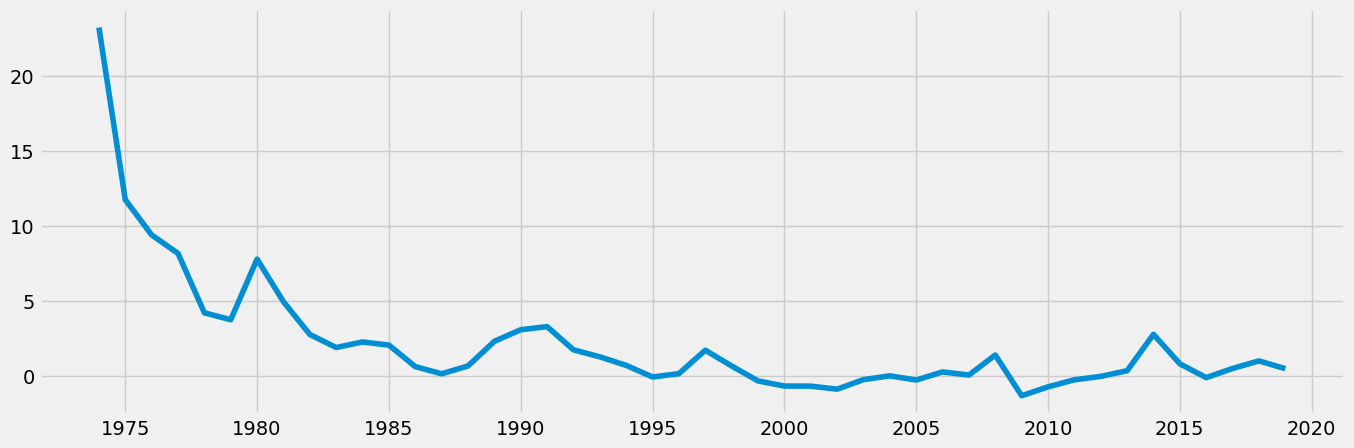

In [19]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [20]:
# Check for missing values (you shouldn't have any)

data_sub.isnull().sum()

Value    0
dtype: int64

In [21]:
# Check for duplicates

dups = data_sub.duplicated()
dups.sum()

# No dups!

0

In [22]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')